In [62]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [63]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/BAJAJ-AUTO.csv")

In [64]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.0,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.0,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.9,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.4,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.0,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420


In [65]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [66]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3.202000e+03,3.202000e+03,2456.000000,3.202000e+03,3202.000000
mean,2189.871065,2191.537883,2219.934510,2162.215209,2190.307917,2190.412196,2191.294288,4.114639e+05,9.644024e+13,27487.876629,1.944837e+05,0.509401
std,774.552766,776.148452,781.289529,770.192017,775.065896,775.095766,775.657353,3.911067e+05,1.174628e+14,19453.983219,1.707922e+05,0.172869
min,301.900000,262.000000,307.050000,262.000000,300.000000,301.900000,301.980000,4.966000e+03,2.497018e+11,451.000000,1.290000e+03,0.073000
25%,1661.925000,1663.250000,1693.775000,1636.362500,1660.512500,1661.925000,1664.845000,2.054658e+05,4.228246e+13,16041.250000,9.553850e+04,0.391225
50%,2269.950000,2270.000000,2305.575000,2240.250000,2270.750000,2270.225000,2269.900000,3.125365e+05,6.885321e+13,22822.000000,1.537390e+05,0.520000
75%,2808.437500,2810.000000,2834.950000,2778.362500,2808.975000,2808.487500,2808.565000,5.000315e+05,1.107763e+14,32952.250000,2.456250e+05,0.626675
max,4237.450000,4260.000000,4361.400000,4200.000000,4236.000000,4237.450000,4260.500000,8.537143e+06,3.436565e+15,398043.000000,4.154492e+06,1.000000


In [67]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [68]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [69]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [70]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [71]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [72]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [73]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3197,1.985854,1.538482,3738.85,480016,NaN
3198,1.899549,1.247710,3785.50,518487,NaN
3199,3.861308,2.091836,3889.75,1252958,NaN
3200,3.866460,-2.702257,3836.45,1335444,NaN
3201,4.377632,0.755585,3833.75,1340273,NaN


In [74]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_22436\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [75]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [76]:
#Define the prediction model
model = RandomForestRegressor()

In [77]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9128006826180327


In [79]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [80]:
predictions = model.predict(X_Check)

In [81]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

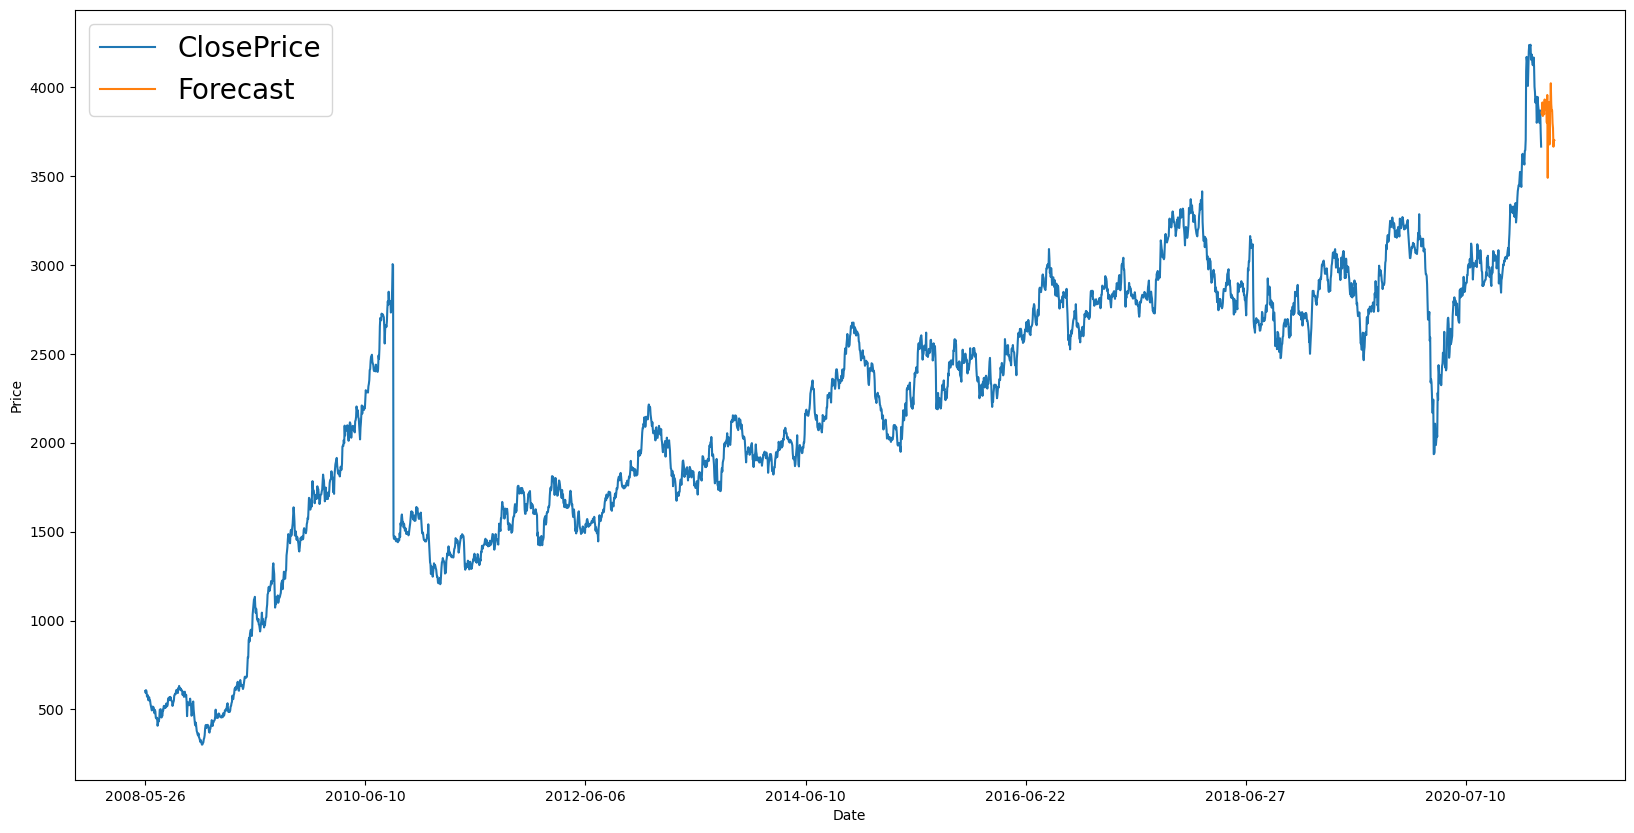

In [82]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')